# The examples of section 3 
## You just need to run the entire notebook.

## Importing libraries : 

In [4]:
import os
import csv
from sklearn.metrics import auc, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from FIF import *

In [2]:
np.random.seed(42)
m =100
n =100
tps = np.linspace(0,1,m)
v = np.linspace(1,1.4,n)
X = np.zeros((n,m))
for i in range(n):
    X[i] = 30 * ((1-tps) ** v[i]) * tps ** v[i]

    
Z1 = np.zeros((m))
for j in range(m):
    if (tps[j]<0.2 or tps[j]>0.8):
        Z1[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 
    else:
        Z1[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + np.random.normal(0,0.3,1)
Z1[0] = 0
Z1[m-1] = 0


Z2 = 30 * ((1-tps) ** 1.6) * tps ** 1.6


Z3 = np.zeros((m))
for j in range(m):
    Z3[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + np.sin(2*np.pi*tps[j])
    
Z4 = np.zeros((m))
for j in range(m):
    Z4[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2
    
for j in range(70,71):
    Z4[j] += 2
    
Z5 = np.zeros((m))
for j in range(m):
    Z5[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + 0.5*np.sin(10*np.pi*tps[j])
    
X = np.concatenate((X,Z1.reshape(1,-1),Z2.reshape(1,-1),  
                     Z3.reshape(1,-1), Z4.reshape(1,-1), Z5.reshape(1,-1)), axis = 0)



# Dictionary Selection:

In [5]:
os.chdir('../Datasets')
X_trainz = pd.read_csv('Handoutlines_Train.csv', header = None)
X_train = np.array(X_trainz, dtype= float )[:,1:]
y_train = np.array(X_trainz, dtype= int )[:,0]
X_testz = pd.read_csv('Handoutlines_Test.csv', header = None)
X_test = np.array(X_testz, dtype= float )[:,1:]
y_test = np.array(X_testz, dtype= int )[:,0]
tps = np.linspace(0,1,X_train.shape[1])
os.chdir('../Section_3')

In [6]:
os.chdir('../Datasets')
X_trainz2 = pd.read_csv('ECG200_Train.csv', header = None)
X_train2 = np.array(X_trainz2, dtype= float )[:,1:]
y_train2 = np.array(X_trainz2, dtype= int )[:,0]
X_testz2 = pd.read_csv('ECG200_Test.csv', header = None)
X_test2 = np.array(X_testz2, dtype= float )[:,1:]
y_test2 = np.array(X_testz2, dtype= int )[:,0]
tps2 = np.linspace(0,1,X_train2.shape[1])
os.chdir('../Section_3')

In [7]:
os.chdir('../Datasets')
X_trainz3 = pd.read_csv('SonyRobotAI1_Train.csv', header = None)
X_train3 = np.array(X_trainz3, dtype= float )[:,1:]
y_train3 = np.array(X_trainz3, dtype= int )[:,0]
X_testz3 = pd.read_csv('SonyRobotAI1_Test.csv', header = None)
X_test3 = np.array(X_testz3, dtype= float )[:,1:]
y_test3 = np.array(X_testz3, dtype= int )[:,0]
tps3 = np.linspace(0,1,X_train3.shape[1])
os.chdir('../Section_3')

In [17]:
def selection_dictionary(X_train, X_test, y_test, tps):
    np.random.seed(42)
    F1 = FIForest(X_train, ntrees=100, time = tps, limit= 10,

                D= 'gaussian_wavelets', innerproduct= "auto",
                  alpha = 0.5)
    S1 = F1.compute_paths()
    a1 = F1.dictionary_selection()

    F2 = FIForest(X_train, ntrees=100, time = tps,limit= 10,

                D= 'cosinus', innerproduct= "auto",
                  alpha = 0.5)
    S2 = F2.compute_paths()
    a2 = F2.dictionary_selection()

    F3 = FIForest(X_train, ntrees=100, time = tps,limit= 10,

                D= 'Brownian', innerproduct= "auto",
                  alpha = 1)
    S3 = F3.compute_paths()
    a3 = F3.dictionary_selection()

    F4 = FIForest(X_train, ntrees=100, time = tps,limit= 10,

                D= 'Brownian_bridge', innerproduct= "auto",
                  alpha = 1)
    S4 = F4.compute_paths()
    a4 = F4.dictionary_selection()

    F5 = FIForest(X_train, ntrees=100, time = tps,limit= 10,

                D= 'Dyadic_indicator', innerproduct= "auto",
                  alpha = 1)
    S5 = F5.compute_paths()
    a5 = F5.dictionary_selection()

    F6 = FIForest(X_train, ntrees=100, time = tps,limit= 10,

                D= 'cosinus', innerproduct= "auto",
                  alpha = 1)
    S6 = F6.compute_paths()
    a6 = F6.dictionary_selection()

    F7 = FIForest(X_train, ntrees=100, time = tps,limit= 10,

                D= 'gaussian_wavelets', innerproduct= "auto",
                  alpha = 1)
    S7 = F7.compute_paths()
    a7 = F7.dictionary_selection()

    AUC = np.zeros(7)
    Count = np.zeros(7)

    AUC[0] = roc_auc_score(y_test, -S1)
    AUC[1] = roc_auc_score(y_test, -S2)
    AUC[2] = roc_auc_score(y_test, -S3)
    AUC[3] = roc_auc_score(y_test, -S4)
    AUC[4] = roc_auc_score(y_test, -S5)
    AUC[5] = roc_auc_score(y_test, -S6)
    AUC[6] = roc_auc_score(y_test, -S7)

    Count[0] = a1
    Count[1] = a2
    Count[2] = a3
    Count[3] = a4
    Count[4] = a5
    Count[5] = a6
    Count[6] = a7
    
    return AUC, Count

In [18]:
a1, b1  = selection_dictionary(X_train, X_test, y_train, tps)
a2, b2  = selection_dictionary(X_train2, X_test2, y_train2, tps2)
a3, b3  = selection_dictionary(X_train3, X_test3, y_train3, tps3)

In [19]:
print(a1)
print(b1)

[0.83212387 0.84139836 0.84070126 0.82556418 0.82912763 0.82615303
 0.84075755]
[2742. 2460. 2304. 2598. 2406. 2325. 2532.]


In [20]:
print(np.argsort(a1))
print(np.argsort(b1))

[3 5 4 0 2 6 1]
[2 5 4 1 6 3 0]


In [21]:
print(a2)
print(b2)

[0.87330528 0.87564282 0.83029453 0.84385227 0.86489014 0.86161758
 0.87844787]
[1887. 2028. 1894. 1949. 1819. 1857. 1787.]


In [22]:
print(a3)
print(b3)

[0.97619048 0.875      0.98809524 0.96428571 0.96428571 0.92857143
 0.96428571]
[725. 722. 764. 749. 783. 777. 718.]


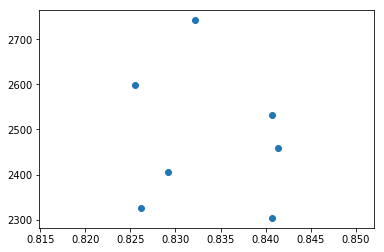

In [23]:
plt.scatter(a1,b1)

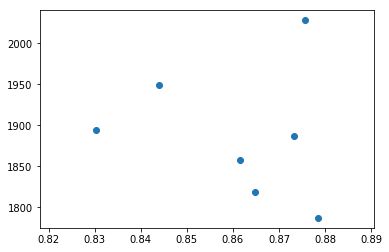

In [24]:
plt.scatter(a2,b2)

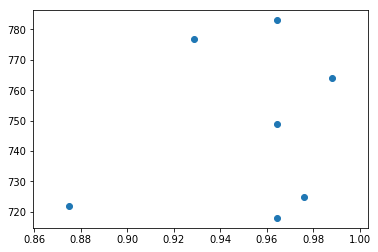

In [25]:
plt.scatter(a3,b3)

In [19]:
liste1 = np.linspace(-4,4,3)
#[-4, -2, 0, 2, 4]
liste2 = np.linspace(0.2,1,50)
#[0.2, 0.4, 0.6, 0.8, 1]

In [20]:
a = F1.out_of_bag(liste1, liste2)

In [15]:
liste1

array([-4.,  0.,  4.])

In [75]:
a

array([[1.35969733, 1.28079046, 1.29737308, 1.40671762, 1.38764087,
        1.3673687 , 1.40020759, 1.44231006, 1.31853666, 1.39049315,
        1.26107036, 1.32343398, 1.38698979, 1.315538  , 1.39554153,
        1.35291373, 1.36858201, 1.37096129, 1.39164213],
       [1.31543251, 1.44576851, 1.52182617, 1.39196621, 1.37242454,
        1.41112774, 1.38511097, 1.500067  , 1.45472346, 1.44248223,
        1.35691718, 1.44017502, 1.41254668, 1.39410751, 1.39857815,
        1.33329419, 1.41109075, 1.41091544, 1.42754371]])

In [ ]:
for i in range(len(liste1)-1):
    plt.scatter(np.repeat(liste1[i],len(liste2)), liste2, s=a[i]**15, c='r')


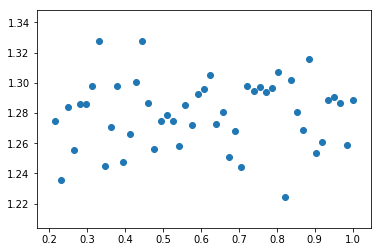

In [ ]:
plt.scatter(liste2[1:] , a[0])

In [ ]:
plt.scatter(liste2[1:] , a[1])

In [ ]:
F1.Subsample_index_complementary[0]

In [ ]:
F1.Subsample_index[0]

In [ ]:
os.chdir('../Datasets')
X_trainz = pd.read_csv('ECG5000_Train.csv', header = None)
X_train = np.array(X_trainz, dtype= float )[:,1:]
y_train = np.array(X_trainz, dtype= int )[:,0]
time = np.linspace(0,1,X_train.shape[1])
os.chdir('../Section_3')

In [ ]:
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(y_train)):
    if (y_train[i] == 1):
        plt.plot(time, X_train[i,:],c="b",linewidth = 0.5)
    elif(y_train[i] == -1):
        plt.plot(time, X_train[i,:],c="r",linewidth = 0.5)


In [ ]:
X = X_train

In [ ]:
np.random.seed(42)
F1 = FIForest(X, ntrees=100, time = tps, subsample_size= X.shape[0], 
            D= 'cosinus', innerproduct= "auto", alpha = 1, criterion="sample")

In [ ]:
a, b, c = F1.get_Dictionary_information()
b = np.array(b)

In [ ]:
ampl = np.zeros((len(c)))
freq = np.zeros((len(c)))
for i in range(len(c)):
    ampl[i] = c[i][0]
    freq[i] = c[i][1]

In [ ]:
plt.scatter(ampl,b, s=0.2)
plt.show()

In [ ]:
freq

In [ ]:
np.argsort(freq)

In [ ]:
plt.scatter(freq,b,s=0.2)
plt.show()

In [ ]:
b.shape

In [ ]:
e = -1
d = 1

coup =25
z = np.linspace(e,d,coup+1)
m = np.zeros(coup)

for k in range(coup):

    m[k] = np.mean(b[ np.where(np.array([z[k] < x < z[k+1] for x in ampl], dtype=int) == 1)[0]])


In [ ]:
def running_mean(x, N):
    cumsum = np.cumsum(x) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [ ]:
plt.plot(np.linspace(0,1,coup),m)

In [ ]:
N=1000
plt.plot(np.linspace(0,1,len(b)-N), running_mean(b[np.argsort(ampl)],N))

In [ ]:
N=1500
plt.plot(np.linspace(0,1,len(b)-N), running_mean(b[np.argsort(freq)],N))

In [ ]:
running_mean(m,N).shape

In [ ]:
e = 0
d = 10
coup =10
z = np.linspace(e,d,coup+1)
m = np.zeros(coup)

for k in range(coup):
    m[k] = np.mean(b[ np.where(np.array([z[k] < x < z[k+1] for x in freq], dtype=int) == 1)[0]])


In [ ]:
plt.plot(np.linspace(e,d,coup),m)

In [ ]:
for i in range(100):
    plt.plot(a[i])

In [ ]:
b

In [ ]:

for i in range(len(ampl)):
    plt.scatter(ampl[i],freq[i], s=b[i], c='r' )

# Direction importance:

### Constructing Dyadic dictionary by hand:

In [ ]:
def dyadic(J_max=7, m=100):
    a =0
    t = np.linspace(0,1,m)
    D = np.zeros((np.sum(np.power(2,np.arange(J_max))),m))
    for J in range(J_max):
        b = np.power(2,J)
        for k in range(b):
            for l in range(m):
                x = b * t[l] - k
                D[a,l] = 1 * (0 <= x < 1)
            a += 1
    return D

### Importing dataset:

In [3]:
os.chdir('../Datasets')
X_trainz = pd.read_csv('CinECGTorso_Train.csv', header = None)
X_train = np.array(X_trainz, dtype= float )[:,1:]
y_train = np.array(X_trainz, dtype= int )[:,0]
time = np.linspace(0,1,X_train.shape[1])
os.chdir('../Section_3')

### Plotting the dataset:

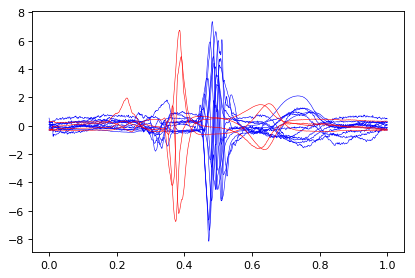

In [61]:
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(y_train)):
    if (y_train[i] == 1):
        plt.plot(time, X_train[i,:],c="b",linewidth = 0.5)
    elif(y_train[i] == -1):
        plt.plot(time, X_train[i,:],c="r",linewidth = 0.5)


### Applying FIF:

In [ ]:
np.random.seed(42)
D1 = dyadic(6, m=X_train.shape[1])
F1 = FIForest(X_train, ntrees=100, time = time, subsample_size= X_train.shape[0], 
            D= D1, innerproduct= "auto", alpha = 1, criterion="sample")
b = F1.importance_feature()

### Plotting the histogram of feature importance:

In [ ]:
plt.figure(figsize=(6,4))
plt.bar( np.arange(len(b)), height= np.flip(np.sort(b)), color='r' )
#plt.savefig('feature_importance.pdf')
plt.show()

### Plotting the two best directions:

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(time, D1[np.flip(np.argsort(b))[0]], c='g')
plt.plot(time, D1[np.flip(np.argsort(b))[1]], c='orange')
plt.show()

# The example with different kind of anomaly:

### Constructing the dataset :

In [2]:
np.random.seed(42)
m =100
n =100
tps = np.linspace(0,1,m)
v = np.linspace(1,1.4,n)
X = np.zeros((n,m))
for i in range(n):
    X[i] = 30 * ((1-tps) ** v[i]) * tps ** v[i]

    
Z1 = np.zeros((m))
for j in range(m):
    if (tps[j]<0.2 or tps[j]>0.8):
        Z1[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 
    else:
        Z1[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + np.random.normal(0,0.3,1)
Z1[0] = 0
Z1[m-1] = 0


Z2 = 30 * ((1-tps) ** 1.6) * tps ** 1.6


Z3 = np.zeros((m))
for j in range(m):
    Z3[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + np.sin(2*np.pi*tps[j])
    
Z4 = np.zeros((m))
for j in range(m):
    Z4[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2
    
for j in range(70,71):
    Z4[j] += 2
    
Z5 = np.zeros((m))
for j in range(m):
    Z5[j] = 30 * ((1-tps[j]) ** 1.2) * tps[j] ** 1.2 + 0.5*np.sin(10*np.pi*tps[j])
    
X = np.concatenate((X,Z1.reshape(1,-1),Z2.reshape(1,-1),  
                     Z3.reshape(1,-1), Z4.reshape(1,-1), Z5.reshape(1,-1)), axis = 0)



### Applying FIF :

In [3]:
# Sobolev scalar product and Gaussian wavelets dictionary :

#pas mal avec psi=100 et alpha = 0.5 ou alpha=0.7
np.random.seed(42)
F3  = FIForest(X, D="gaussian_wavelets", time=tps, innerproduct="auto", alpha=0.5)
S3  = F3.compute_paths()

### Plotting the dataset :

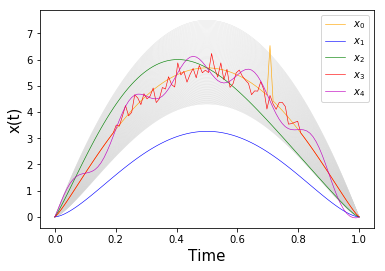

In [4]:
plt.figure(figsize=(6,4))
for i in range(100):
    plt.plot(tps, X[i], c='Lightgray', linewidth=0.3)
    
plt.plot(tps,Z4,c='orange', label='$x_0$', linewidth=0.6)

plt.plot(tps,Z2,c='b', label='$x_1$', linewidth=0.6)
plt.plot(tps,Z3,c='g', label='$x_2$', linewidth=0.6)
plt.plot(tps,Z1,c='r', label='$x_3$', linewidth=0.6)
plt.plot(tps,Z5,c='m', label='$x_4$', linewidth=0.6)

plt.legend()
plt.ylabel('x(t)',size='15')
plt.xlabel('Time',size=15)
#plt.savefig('anomaly_example.pdf')
plt.show()

### Plotting the sorted dataset :

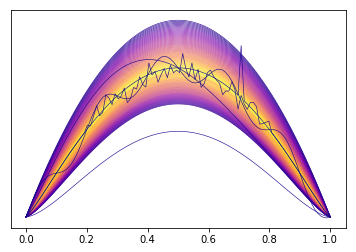

In [5]:
colors = [ matplotlib.cm.plasma_r(x)
            for x in np.linspace(0, 1, len(S3)) ]
plt.figure(figsize=(6,4))
for j in range(0,len(colors)):
    plt.plot(tps, X[np.argsort(S3)[j],:], '-', c=colors[j], zorder=1, linewidth = 0.6)
    #plt.xlabel('Time')
    #plt.ylabel('x(t)')
    #plt.title('Alpha = 1', size=20)

  
    
sm = plt.cm.ScalarMappable(cmap=matplotlib.cm.viridis_r,
 
                                   norm=plt.Normalize(vmin=0, vmax=1))
plt.yticks([]) 
sm._A = []
#plt.savefig('anomaly_example_rank.pdf')
plt.show()

### Plotting the sorted score of the dataset :

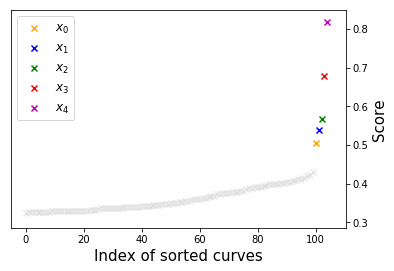

In [6]:
fig= plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
for i in range(len(S3)-5):
    ax.scatter(np.arange(len(S3))[i],np.sort(S3)[i], color='Lightgray', marker='x',alpha=0.5)

ax.scatter(100, np.sort(S3)[100], color='orange', marker='x', label='$x_0$')
ax.scatter(101, np.sort(S3)[101], c='b', marker='x', label='$x_1$')
ax.scatter(102, np.sort(S3)[102], c='g', marker='x',  label='$x_2$')
ax.scatter(103, np.sort(S3)[103], c='r', marker='x', label='$x_3$')
ax.scatter(104, np.sort(S3)[104], c='m', marker='x', label='$x_4$')

ax.set_xlabel('Index of sorted curves',size=15)
ax.yaxis.tick_right()

ax.yaxis.set_label_position("right")
ax.set_ylabel('Score',size=15)
ax.legend(fontsize='large')
#plt.savefig("anomaly_example_score.pdf")
plt.show()